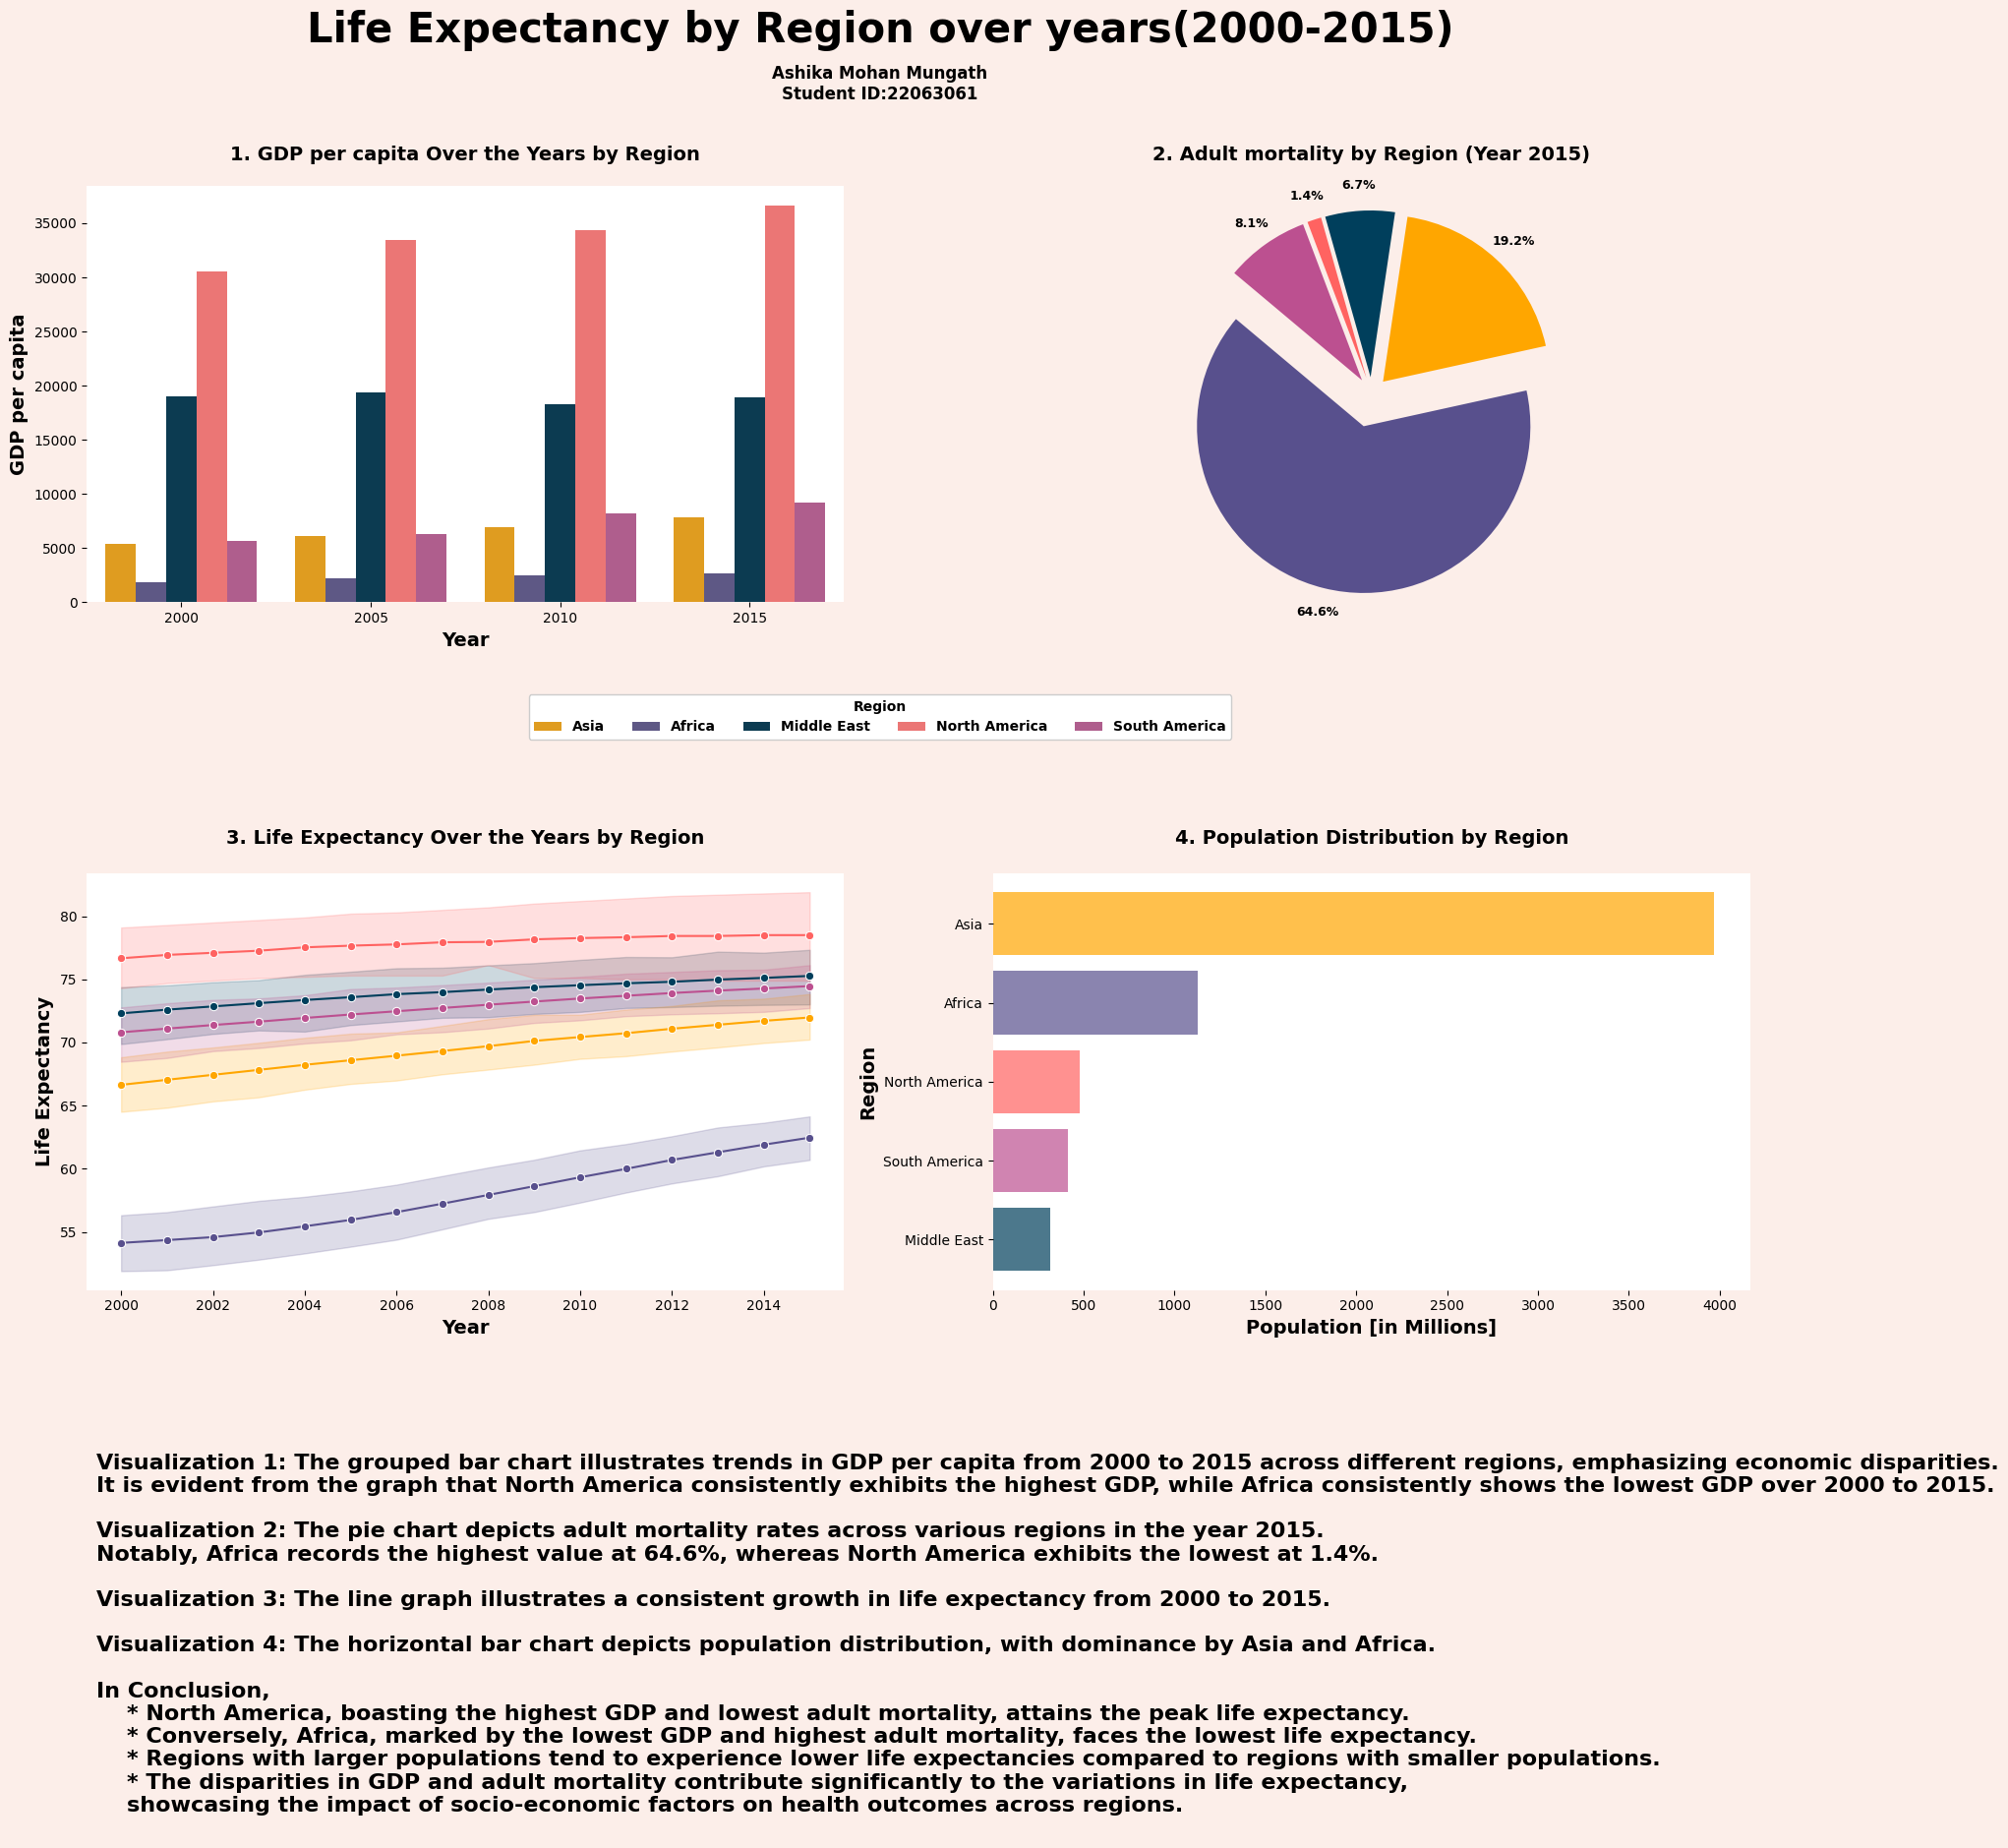

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read the data
Original_dataUri = 'Life-Expectancy-Data-Updated.csv'
data = pd.read_csv(Original_dataUri)

# Define region colors
region_colors = {
    'Africa': '#58508d',
    'North America': '#ff6361',
    'South America': '#bc5090',
    'Asia': '#ffa600',
    'Middle East': '#003f5c'
}

# Define the regions of interest
Region = ["Africa", "North America", "South America", "Asia", "Middle East"]

# Filter the original dataset based on the specified regions
filtered_data = data[data["Region"].isin(Region)].dropna()

# Save the filtered data to a new CSV file named "filtered.csv" without including index column
filtered_data.to_csv("filtered.csv", index=False)

# Define the years to be plotted
years_to_plot = np.arange(2000, 2016, 5)

# Select a subset of the filtered data for the specified years
filtered_data_subset = filtered_data[filtered_data['Year'].isin(years_to_plot)]

# Further filter the data to focus on the year 2015
filtered_data_2015 = filtered_data[filtered_data['Year'] == 2015]

# Group the data for analysis, specifically for Adult Mortality and Population
grouped_df_adult = filtered_data_2015.groupby(
    'Region')['Adult_mortality'].sum().reset_index()

grouped_df_pop = filtered_data_2015.groupby(
    'Region')['Population_mln'].sum().reset_index()

# Sort the population data
sorted_df_pop = grouped_df_pop.sort_values(by='Population_mln')

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 13), facecolor='#fceee9')

# Title space for the description
fig.suptitle('Life Expectancy by Region over years(2000-2015)',
             fontsize=30, y=1.05, fontweight='bold')
name_student_id = 'Ashika Mohan Mungath\nStudent ID:22063061'

# Add the text below the title
fig.text(0.5, .98, name_student_id, ha='center',
         fontsize=12, fontweight='bold')

# Grouped barchart
sns.barplot(x='Year', y='GDP_per_capita', hue='Region', data=filtered_data_subset,
            palette=region_colors, errorbar=None, ax=axes[0, 0])
axes[0, 0].set_xlabel('Year', fontweight='bold', fontsize=14)
axes[0, 0].set_ylabel('GDP per capita', fontweight='bold', fontsize=14)
axes[0, 0].set_title('1. GDP per capita Over the Years by Region',
                     fontweight='bold', y=1.04, fontsize=14)
axes[0, 0].legend().set_visible(False)

# Piechart for the year 2015
explode = (0.2, 0.1, 0.1, 0.1, 0.1)
wedges, texts, autotexts = axes[0, 1].pie(grouped_df_adult['Adult_mortality'], labels=None, autopct='%1.1f%%',
                                          startangle=140, colors=[region_colors[region] for region in grouped_df_adult['Region']],
                                          pctdistance=1.15, explode=explode, radius=1.0)
for autotext in autotexts:
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')
axes[0, 1].set_title('2. Adult mortality by Region (Year 2015)',
                     fontweight='bold', fontsize=14, y=1.04)

# Line chart
sns.lineplot(x='Year', y='Life_expectancy', hue='Region',
             data=filtered_data, palette=region_colors, marker='o', ax=axes[1, 0])
axes[1, 0].set_xlabel('Year', fontweight='bold', fontsize=14)
axes[1, 0].set_ylabel('Life Expectancy', fontweight='bold', fontsize=14)
axes[1, 0].set_title('3. Life Expectancy Over the Years by Region',
                     fontweight='bold', y=1.05, fontsize=14)
axes[1, 0].legend().set_visible(False)

# Horizontal bargraph for the year 2015
axes[1, 1].barh(sorted_df_pop['Region'], sorted_df_pop['Population_mln'], color=[
                region_colors[region] for region in sorted_df_pop['Region']], alpha=0.7)
axes[1, 1].set_xlabel("Population [in Millions]",
                      fontweight='bold', fontsize=14)
axes[1, 1].set_ylabel("Region", fontweight='bold', fontsize=14)
axes[1, 1].set_title("4. Population Distribution by Region",
                     fontweight='bold', y=1.05, fontsize=14)

# Legend
handles, labels = axes[0, 0].get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper center', title='Region', bbox_to_anchor=(
    0.5, 0.52), ncol=5, facecolor='white', framealpha=1, fontsize=10)
for text in legend.get_texts():
    text.set_fontweight('bold')
legend.get_title().set_fontweight('bold')

# Remove the outlines from the subplots
for ax in axes.flatten():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Adjust layout with margins
plt.tight_layout(rect=[0, 0, 1, 1])
plt.subplots_adjust(hspace=0.65)

# Adding description text
description_text = """
    Visualization 1: The grouped bar chart illustrates trends in GDP per capita from 2000 to 2015 across different regions, emphasizing economic disparities.
    It is evident from the graph that North America consistently exhibits the highest GDP, while Africa consistently shows the lowest GDP over 2000 to 2015.

    Visualization 2: The pie chart depicts adult mortality rates across various regions in the year 2015.
    Notably, Africa records the highest value at 64.6%, whereas North America exhibits the lowest at 1.4%.

    Visualization 3: The line graph illustrates a consistent growth in life expectancy from 2000 to 2015.

    Visualization 4: The horizontal bar chart depicts population distribution, with dominance by Asia and Africa.

    In Conclusion,
        * North America, boasting the highest GDP and lowest adult mortality, attains the peak life expectancy.
        * Conversely, Africa, marked by the lowest GDP and highest adult mortality, faces the lowest life expectancy.
        * Regions with larger populations tend to experience lower life expectancies compared to regions with smaller populations.
        * The disparities in GDP and adult mortality contribute significantly to the variations in life expectancy, 
        showcasing the impact of socio-economic factors on health outcomes across regions.
"""

# Add description text to the bottom of the figure
fig.text(0.04, -0.38, description_text, ha='left',
         va='bottom', fontsize=16, fontweight='bold')

# Save the plot as PNG
plt.savefig("22063061.png", dpi=300, bbox_inches='tight')
plt.show()